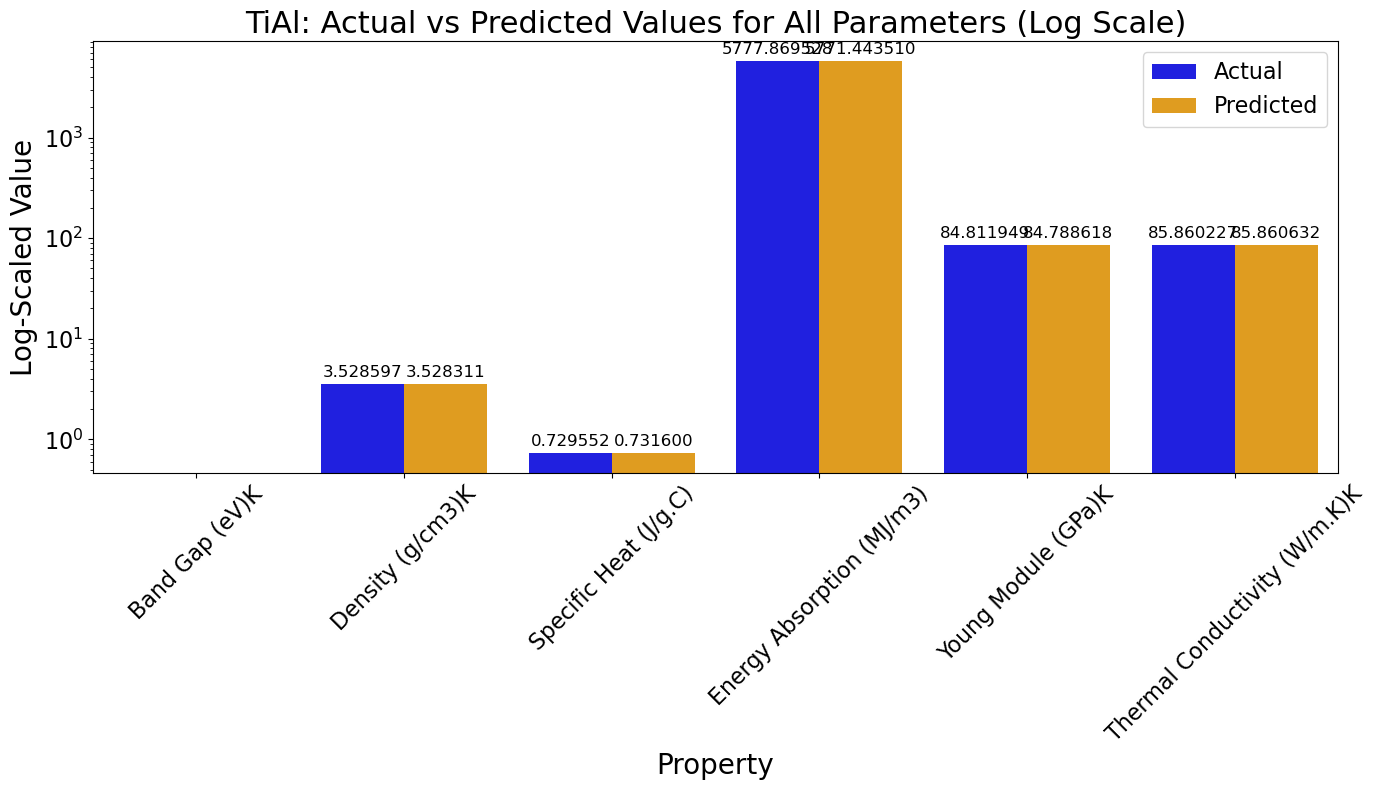

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine actual and predicted values from both sets into one dictionary
all_actual_values = {
    "Band Gap (eV)K": 0,
    "Density (g/cm3)K": 3.528596843,
    "Specific Heat (J/g.C)": 0.729552,
    "Energy Absorption (MJ/m3)": 5777.869528,
    "Young Module (GPa)K": 84.81194931,
    "Thermal Conductivity (W/m.K)K": 85.86022678
}

all_predicted_values = {
    "Band Gap (eV)K": 0,
    "Density (g/cm3)K": 3.528311,
    "Specific Heat (J/g.C)": 0.731600,
    "Energy Absorption (MJ/m3)": 5771.443510,
    "Young Module (GPa)K": 84.788618,
    "Thermal Conductivity (W/m.K)K": 85.860632
}

# Convert dictionaries to DataFrames
actual_df = pd.DataFrame.from_dict(all_actual_values, orient='index', columns=['Actual'])
predicted_df = pd.DataFrame.from_dict(all_predicted_values, orient='index', columns=['Predicted'])

# Concatenate actual and predicted DataFrames
merged_df = pd.concat([actual_df, predicted_df], axis=1).reset_index().rename(columns={'index': 'Property'})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(merged_df, id_vars=['Property'], var_name='Type', value_name='Value')

# Create the visualization using Seaborn
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=melted_df, x='Property', y='Value', hue='Type', palette=['blue', 'orange'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Property', fontsize=20)
plt.ylabel('Log-Scaled Value', fontsize=20)
plt.title('TiAl: Actual vs Predicted Values for All Parameters (Log Scale)', fontsize=22)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()

# Annotate each bar with its respective value
for bar in bar_plot.containers:
    bar_plot.bar_label(bar, fmt='%.6f', fontsize=12, label_type='edge', padding=3)

plt.show()
